# Wine Quality Detection Using Machine Learning

In [70]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression



%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Data

In [71]:
train_df = pd.read_csv("winequality-white.csv", sep = ';')

In [72]:
train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


This dataset contains 6497 rows and 13 columns. The column "color" is a categorical column. Our objective is to create a model to predict the value in the "quality" column, which contains an integer score for the wine quality, ranging from 0 to 10.

In [73]:
train_df.info()

print("\n\nMissing Values in every column: ")
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Missing Values in every column: 


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

All of the columns except "color" contain numeric values. Additionally, there are no null values in any of the columns. 

In [74]:
train_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Exploratory Data Analysis and Visualization

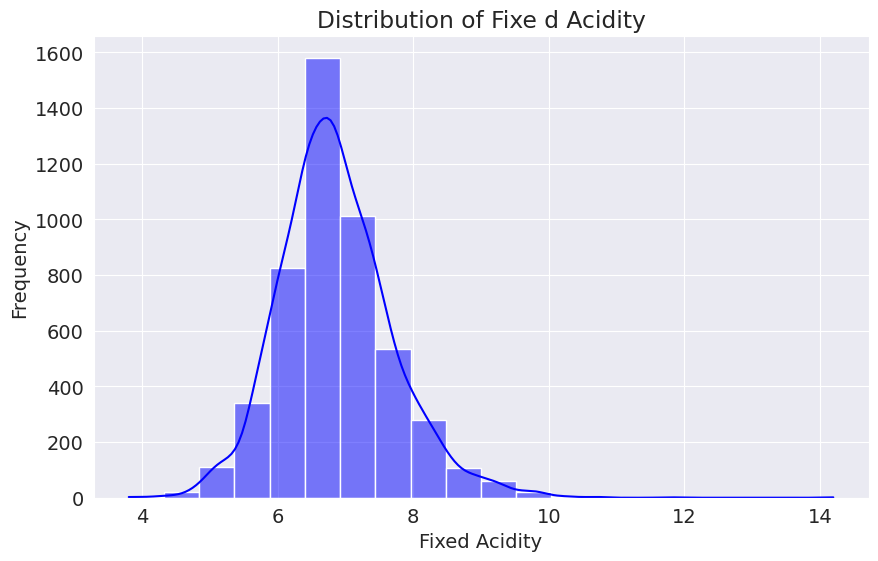

In [75]:
# Histogram for Fixed Acidity
plt.figure(figsize=(10, 6))
sns.histplot(train_df['fixed acidity'], kde=True, color='blue', bins=20)
plt.title('Distribution of Fixe d Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.show()

The distribution of fixed acidity appears to be relatively uniform, with the majority of wines having acidity in the mid-range. Some wines exhibit higher acidity, but they are fewer in number.

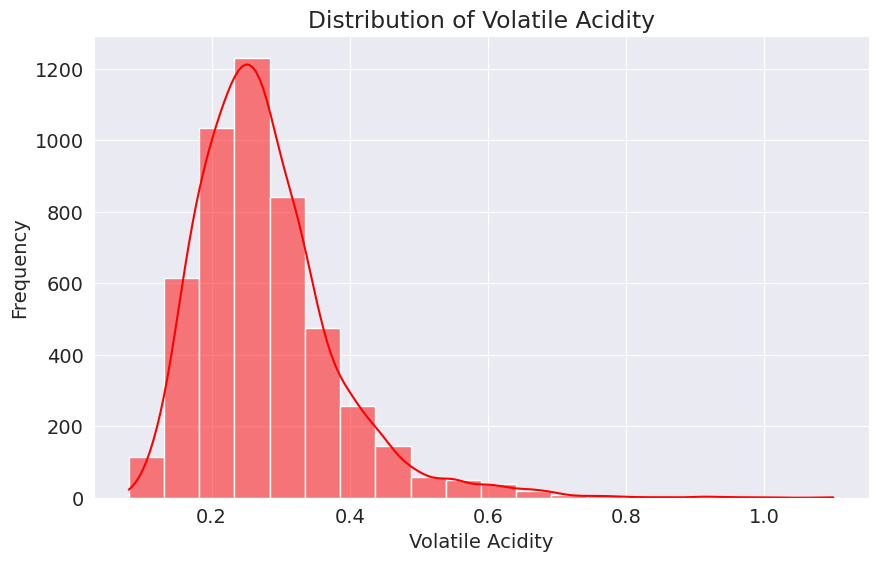

In [76]:
# Histogram for Volatile Acidity
plt.figure(figsize=(10, 6))
sns.histplot(train_df['volatile acidity'], kde=True, color='red', bins=20)
plt.title('Distribution of Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.show()

Volatile acidity is highly skewed, with most wines having lower volatile acidity levels. A high volatile acidity might correlate with poor wine quality or defects.

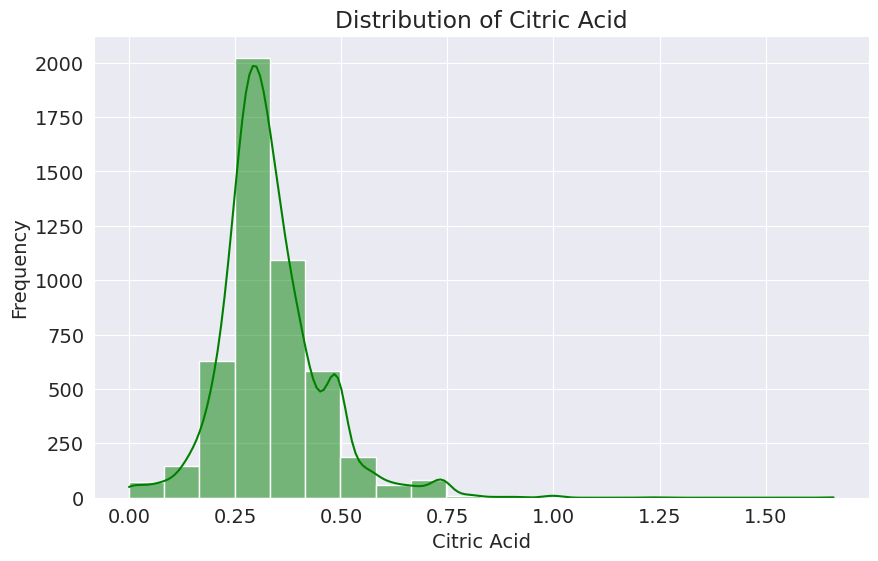

In [77]:
# Histogram for Citric Acid
plt.figure(figsize=(10, 6))
sns.histplot(train_df['citric acid'], kde=True, color='green', bins=20)
plt.title('Distribution of Citric Acid')
plt.xlabel('Citric Acid')
plt.ylabel('Frequency')
plt.show()

Citric acid values are somewhat spread across a range, with a slight peak in the lower range. This might contribute to the overall freshness and balance of the wine, influencing its flavor profile.

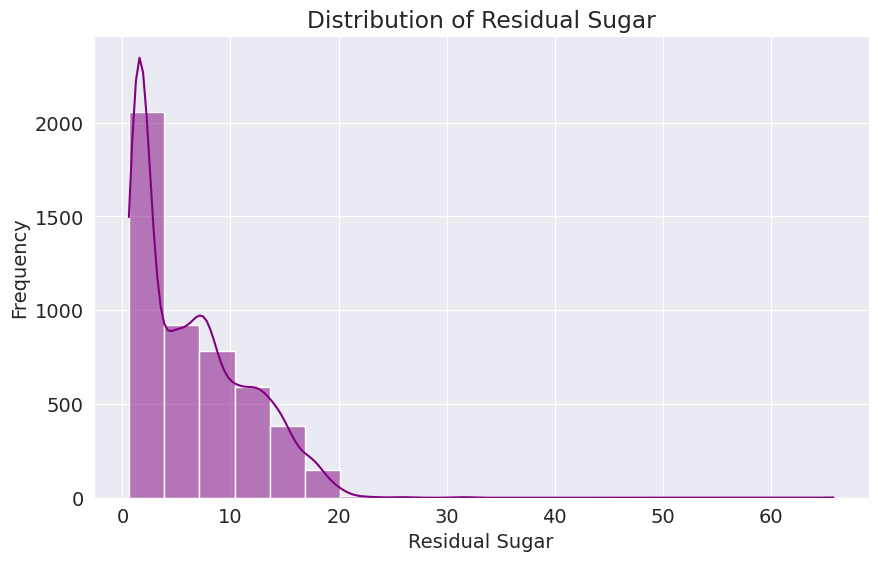

In [78]:
# Histogram for Residual Sugar
plt.figure(figsize=(10, 6))
sns.histplot(train_df['residual sugar'], kde=True, color='purple', bins=20)
plt.title('Distribution of Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.show()

Most wines have lower residual sugar content, with a few having very high values. Higher residual sugar wines are often sweeter, contributing to the body and texture of the wine.

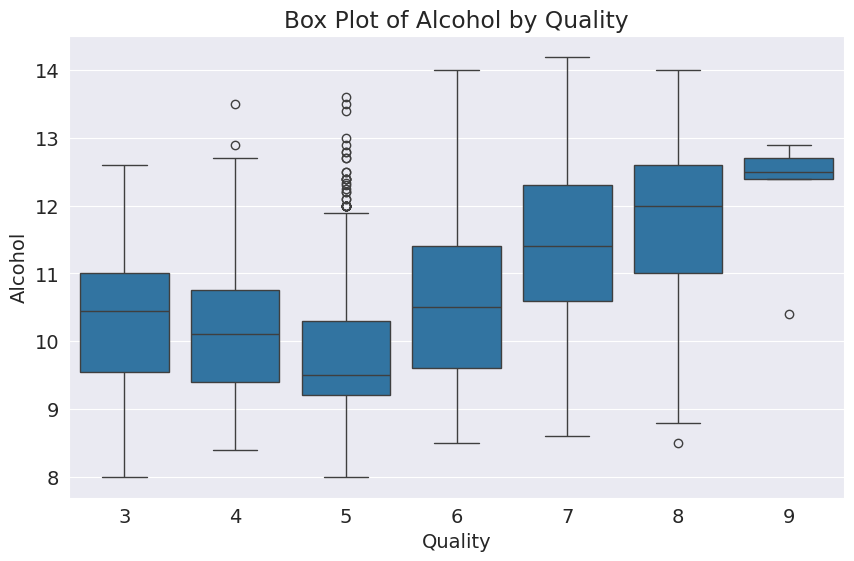

In [79]:
# Box plot for Alcohol by Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=train_df)
plt.title('Box Plot of Alcohol by Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

Alcohol appears to increase with quality, suggesting that wines with higher alcohol content tend to be of better quality, which could be a result of the fermentation process.

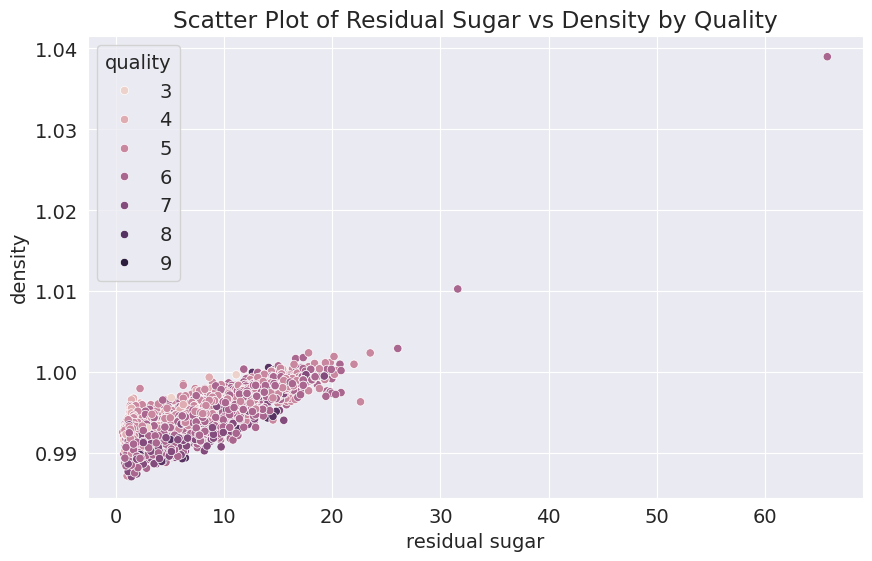

In [80]:
# Scatter Plot for Residual Sugar vs Density by Quality
sns.scatterplot(data=train_df, x="residual sugar", y="density", hue="quality")
plt.title('Scatter Plot of Residual Sugar vs Density by Quality')  
plt.show()

It seems like residual sugar and desnity have a strong positive linear relationship

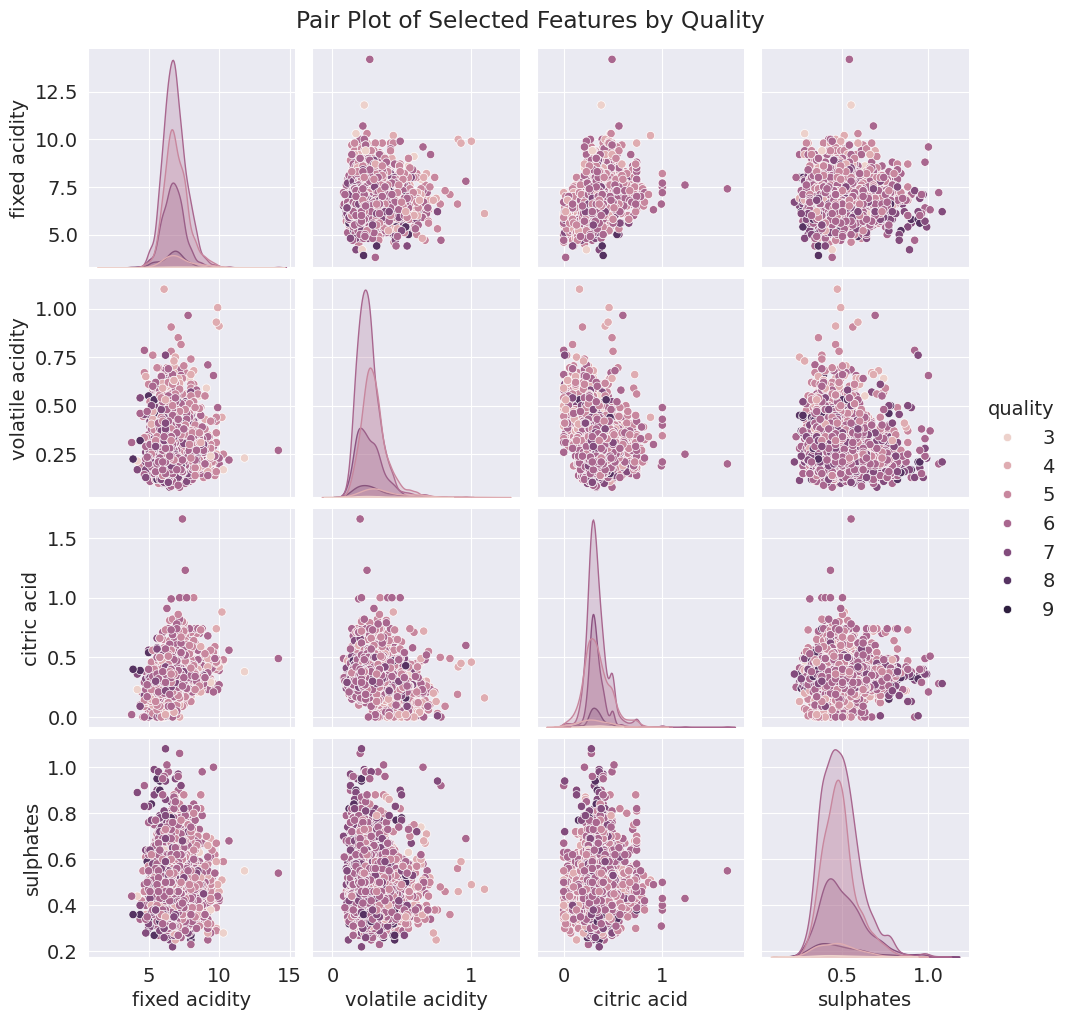

In [81]:
# Pair plot for selected features
sns.pairplot(train_df, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'sulphates'], hue='quality')
plt.suptitle('Pair Plot of Selected Features by Quality', y=1.02)
plt.show()

## Preparing the Data for Training

### Training, Validation and Test Sets

In [82]:
train_val_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [83]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (2938, 12)
val_df.shape : (980, 12)
test_df.shape : (980, 12)


### Input and Target Columns

In [84]:
train_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [85]:
input_cols = list(train_df.columns)[0:-1]
target_col = list(train_df.columns)[-1]

In [86]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [87]:
train_inputs

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1474,6.9,0.25,0.24,3.60,0.057,13.0,85.0,0.99420,2.99,0.48,9.5
3767,6.9,0.40,0.17,12.90,0.033,59.0,186.0,0.99754,3.08,0.49,9.4
1854,6.8,0.24,0.35,6.40,0.048,44.0,172.0,0.99440,3.29,0.55,10.5
173,6.3,0.22,0.43,4.55,0.038,31.0,130.0,0.99180,3.35,0.33,11.5
1312,9.6,0.25,0.54,1.30,0.040,16.0,160.0,0.99380,2.94,0.43,10.5
...,...,...,...,...,...,...,...,...,...,...,...
484,6.2,0.37,0.30,6.60,0.346,79.0,200.0,0.99540,3.29,0.58,9.6
3861,6.2,0.22,0.30,12.40,0.054,108.0,152.0,0.99728,3.10,0.47,9.5
4344,6.7,0.27,0.69,1.20,0.176,36.0,106.0,0.99288,2.96,0.43,9.2
753,7.0,0.21,0.34,8.50,0.033,31.0,253.0,0.99530,3.22,0.56,10.5


In [88]:
train_targets

1474    4
3767    5
1854    7
173     7
1312    5
       ..
484     5
3861    6
4344    6
753     6
1917    6
Name: quality, Length: 2938, dtype: int64

Now, let's identify the numerical and categorical columns

In [89]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

In [90]:
print(numeric_cols)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Scaling Numeric Features

In this section, we scale all the numeric features to a range between (0,1). Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss.

In [91]:
scaler = MinMaxScaler()

In [92]:
scaler.fit(train_df[numeric_cols])

MinMaxScaler()

Now, we seperately scale the training, validation, and test sets using the transform method of scalar.

In [93]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

Now, let us review if each of the numeric columns have been appropriately scaled.

In [94]:
train_inputs[numeric_cols].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,0.350717,0.194196,0.271254,0.185227,0.108592,0.222261,0.428045,0.297907,0.428251,0.321955,0.417161
std,0.111976,0.098770,0.096665,0.161459,0.063946,0.116117,0.141598,0.125556,0.136919,0.136129,0.202774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.276316,0.127451,0.219512,0.035484,0.080119,0.139373,0.326050,0.199655,0.336364,0.226190,0.247934
50%,0.342105,0.176471,0.260163,0.147581,0.100890,0.209059,0.416807,0.284174,0.418182,0.297619,0.396694
75%,0.407895,0.235294,0.308943,0.293548,0.121662,0.292683,0.524370,0.387667,0.518182,0.392857,0.561983
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

## Saving Processed Data to Disk

In [96]:
import sys
!{sys.executable} -m pip install pyarrow
!{sys.executable} -m pip install fastparquet
import pyarrow
import fastparquet

In [97]:
pd.DataFrame(X_train).to_parquet('train_targets.parquet', engine='fastparquet')
pd.DataFrame(X_val).to_parquet('val_targets.parquet', engine='fastparquet')
pd.DataFrame(X_test).to_parquet('test_targets.parquet', engine='fastparquet')

Now that the processed data has been stored to the disk, we do not have to repeat the preprocessing steps every time you use the jupyter notebook. The saved data can be read back using 'pd.read_parquet'.

## Training Decision Trees

In [98]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [99]:
train_score, val_score = test_params()
print("Train Accuracy: ", train_score)
print("Validation Accuracy: ", val_score)

Train Accuracy:  1.0
Validation Accuracy:  0.6775510204081633


Although the training accuracy is 100%, the validation accuracy is only 66.5%. This indiscates that we are overfitting our model on the training data.

## Hyperparameter Tuning

In [100]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [5, 10, 15, None],        # Depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples to split
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples at leaf
    'max_features': ['sqrt', 'log2', None]  # Features to consider for each split
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, train_targets)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


-----To Be Continued-----